## Spam vs. Ham

Целью данного задания является научится отличать письма со спамом 

**Задача 1 (2 балла). Чтение данных ** 

Прочитайте данные из файла spam.csv используя средства модуля [pandas](https://pandas.pydata.org/). В первом столбце пометка о роде письма (spam/ham). Будем считать, что все письма с пометкой spam лежать в первом классе, а остальные в нулевом. Во второй колонке текст сообщения. Отобразите таблицу в следующем виде
![example](table_example.png)

In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')
[df.pop(x) for x in ('Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4')]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['class'] = (df['v1'] == 'spam') #true/false values for class
df['class'] = df['class'].astype(int) #1/0 values
df.pop('v1')
df.columns = ['text','class']

In [5]:
df.head() #итоговая таблица с текстами и классами писем

,text,class
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


**Задача 2 (3 балла). Предобработка ** 

Перевидите все буквы в нижний регистр. 

С помошью [регулярных выражений](https://docs.python.org/2/library/re.html) почистите текст отставляя только слова (удалите знаки припенания, а также все числа можно заменить на N и т.п.). 

Оформите это в виде функции, которая принимает на вход некоторый список текстов и возвращает, соответственно, предобработанный список текстов. 

Преобразуйте таблицу с данными, так чтобы в ней содержались предобработанные тексты (далее мы будем работать только с ними).

In [6]:
def preprocess(text_list):
    clean_texts = []
    for text in text_list:
        no_numbers = re.sub(r'[0-9]+', ' N ', text.lower()) #приводим к нижнему регистру, заменяем числа на N
        tokens = ' '.join(re.findall(r'[a-zN]+', no_numbers)) #оставляем только слова и N
        clean_texts.append(tokens) #предобработанный список
    return clean_texts

In [7]:
df.text = preprocess(df.text)

In [8]:
df.head()

,text,class
0,go until jurong point crazy available only in ...,0
1,ok lar joking wif u oni,0
2,free entry in N a wkly comp to win fa cup fina...,1
3,u dun say so early hor u c already then say,0
4,nah i don t think he goes to usf he lives arou...,0


**Задача 3 (3 балла). Формирование словаря** 

Сформируйте словарь, ключами которого являются слова встречающееся в тексте, а значениями -- колличество раз, которое они встретились в корпусе текста. 

Оформите это в виде функции, которая принимает на вход список текстов и возвращает словарь. 

Какой размер словаря вы получили?

In [9]:
def make_dict(text_list):
    dictionary = {}
    for text in text_list:
        token_list = text.split(' ')
        for token in token_list:
            if token!='':
                dictionary.setdefault(token, 0)
                dictionary[token] += 1
    return dictionary

In [10]:
dictionary = make_dict(df.text) 

In [11]:
len(dictionary) #размер словаря

7709

 **Задача 4 (2 балла). Удаление стоп-слов** 

Отсортируйте слова по убыванию частоты их встречаемости в текстах. 

С помощью модуля [matplotlib.pyplot](https://matplotlib.org/api/pyplot_api.html) постройте график частот встречаемости слов в тексте. 

Распечатайте топ-10 слов и их частоты. 

Какие слова чаще всего встречаются в тексте? Значимые ли это слова? 

In [12]:
dict = sorted(dictionary.items(), key = lambda item:item[1], reverse = True) #сортировка слов по убыванию частоты

In [13]:
import matplotlib.pyplot as plt

In [14]:
dict_small = dict[:20]
dict_small

[('N', 4554),
 ('i', 3018),
 ('you', 2243),
 ('to', 2242),
 ('a', 1451),
 ('the', 1332),
 ('u', 1212),
 ('and', 979),
 ('in', 902),
 ('is', 890),
 ('me', 803),
 ('my', 762),
 ('it', 747),
 ('for', 705),
 ('your', 681),
 ('of', 622),
 ('call', 606),
 ('s', 589),
 ('that', 584),
 ('have', 575)]

In [15]:
key, value = zip(*dict_small)

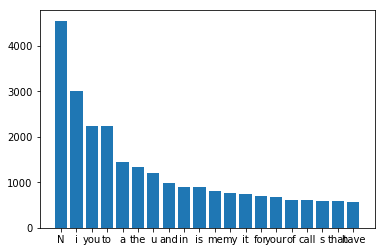

In [16]:
plt.bar(range(len(dict_small)),value) #график частотности первых 20 слов словаря 
plt.xticks(range(len(dict_small)), key)
plt.show()

In [17]:
dict[:10] #топ-10 слов по встречаемости - малозначимые слова (артикли, предлоги, местоимения и числа N)

[('N', 4554),
 ('i', 3018),
 ('you', 2243),
 ('to', 2242),
 ('a', 1451),
 ('the', 1332),
 ('u', 1212),
 ('and', 979),
 ('in', 902),
 ('is', 890)]

**Задача 5 (5 баллов). Функциия предобработки и удаление стоп-слов. ** 

Для удаления стоп-слов можно использовать модуль [nltk](http://www.nltk.org/). Импортируйте stopwords из nltk.corpus, далее чтобы получить список английских стоп-слов нужно сделать stopwords.words('english').

Перепишите функцию предобрабитки так, чтобы она на вход принимала список текстов и список стоп-слов, чистела текст (в том числе удаляла стоп-слова), возвращала список предобработанных текстов.  

Преобразуйте таблицу с данными, так чтобы в ней содержались новые предобработанные тексты (далее мы будем работать только с ними). 

Сформируйте словарь. 

Постройте график частот встречаемости слов в тексте. 

Распечатайте топ-10 слов и их частоты. 

Какой размер словаря вы получили теперь? Остались ли ещё высокочастотные неинформативные слова? Что это за слова? Добавте их в список стоп-слов и повторите процедуру.

In [18]:
from nltk.corpus import stopwords
stopwords_eng = stopwords.words('english')

In [19]:
def preprocess2(text_list, stopwords):
    clean_texts = []
    for text in text_list:
        words = re.findall(r'[a-z]+', text.lower()) #приводим к нижнему регистру, извлекаем слова в список
        no_stopwords = []
        [no_stopwords.append(word) for word in words if word not in stopwords] #удаляем стоп-слова            
        tokens = ' '.join(no_stopwords) 
        clean_texts.append(tokens) #предобработанный список
    return clean_texts

In [20]:
emails = pd.read_csv('spam.csv', encoding = 'latin-1')
[emails.pop(x) for x in ('Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4')]
emails['class'] = (emails['v1'] == 'spam').astype(int) #true/false -> 1/0 values for class
emails.pop('v1')
emails.columns = ['text','class']
emails.head()

,text,class
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [21]:
emails.text = preprocess2(emails.text, stopwords_eng)

In [22]:
emails.head()

,text,class
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,u dun say early hor u c already say,0
4,nah think goes usf lives around though,0


In [23]:
email_dict = make_dict(emails.text)
len(email_dict) #новый словарь сократился примерно на 150 слов после удаления стоп-слов

7564

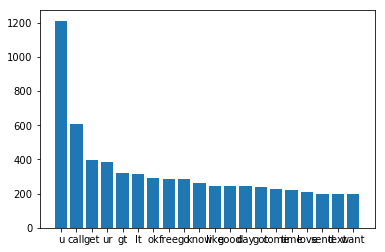

In [24]:
email_dict = sorted(email_dict.items(), key = lambda item:item[1], reverse = True)
email_dict_small = email_dict[:20]
key, value = zip(*email_dict_small)
plt.bar(range(len(email_dict_small)),value) #график частотности первых 20 слов словаря 
plt.xticks(range(len(email_dict_small)), key)
plt.show()

In [25]:
email_dict[:10] #топ-10 слов по частотности в новом словаре

[('u', 1212),
 ('call', 606),
 ('get', 397),
 ('ur', 385),
 ('gt', 318),
 ('lt', 316),
 ('ok', 292),
 ('free', 288),
 ('go', 286),
 ('know', 261)]

После удаления стоп-слов результат стал значительно лучше: среди наиболее частотных слов остались смысловые глаголы и некоторые лишние слова: удалим местоимения (u, ur) и оставшиеся от спецсимволов <> lt, gt.

In [26]:
stopwords_eng.append('u')
stopwords_eng.append('ur')
stopwords_eng.append('lt')
stopwords_eng.append('gt')

In [27]:
emails.text = preprocess2(emails.text, stopwords_eng)
emails.head()

,text,class
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,dun say early hor c already say,0
4,nah think goes usf lives around though,0


In [28]:
email_dict = make_dict(emails.text)
len(email_dict)

7560

In [29]:
email_dict_sort = sorted(email_dict.items(), key = lambda item:item[1], reverse = True)
email_dict_sort[:10] #топ-10 слов по частотности в новом словаре - остались только значимые слова 

[('call', 606),
 ('get', 397),
 ('ok', 292),
 ('free', 288),
 ('go', 286),
 ('know', 261),
 ('like', 245),
 ('good', 245),
 ('day', 242),
 ('got', 240)]

**Задача 6 (5 баллов). Удаление низко частотных слов** 

По сформированому на предыдущем шаге словарю, посмотрите какой процент слов встречается больше одного раза. Нужны ли нам слова которые встретились только один раз? 

Преобразуйте функцию предобработки таким образом, что бы в ней, кроме всего прочего, формировался словарь и удалялись слишком редкие слова. 

Преобразуйте таблицу с данными, так чтобы в ней содержались новые предобработанные тексты (далее мы будем работать только с ними). 

Сформируйте словарь. Каков размер словаря теперь?

In [30]:
k = 0
for key, value in email_dict.items():
    if value == 1:
        k += 1
print(k/len(email_dict)) #доля слов, которые встретились в словаре 1 раз

0.5017195767195767


In [31]:
def preprocess3(text_list, stopwords):
    no_stop_texts = []
    clean_texts = []
    for text in text_list:
        words = re.findall(r'[a-z]+', text.lower()) #приводим к нижнему регистру, извлекаем слова в список
        no_stopwords = []
        [no_stopwords.append(word) for word in words if word not in stopwords] #удаляем стоп-слова 
        no_stop_texts.append(no_stopwords)
    dictionary = {}
    for text in no_stop_texts: #создаем словарь из списка без стоп-слов
        for token in text:
            dictionary.setdefault(token, 0)
            dictionary[token] += 1
    #print('dictionary ', len(dictionary))
    exclude = [] 
    for key, value in dictionary.items(): #создаем список исключений (слов, которые 1 раз встречаются в словаре)
        if value == 1:
            exclude.append(key)
    #print('exclude ', len(exclude))
    for text in no_stop_texts:
        tokens = ' '.join(word for word in text if word not in exclude) 
        clean_texts.append(tokens) #предобработанный список  
    return clean_texts

In [32]:
emails.text = preprocess3(emails.text, stopwords_eng)

In [33]:
emails.head()

,text,class
0,go point crazy available bugis n great world l...,0
1,ok lar joking wif oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,dun say early hor c already say,0
4,nah think goes usf lives around though,0


In [34]:
email_dict = make_dict(emails.text)
len(email_dict) #размер нового словаря после удаления низкочастотных слов

3767

**Задача 7 (5 баллов). Представление в виде мешка слов** 

Реализуйте свою функцию, которая по списку текстов строит представление в виде мешка слов. На вход подаётся список текстов, а возвращает список имен признаков (т.е. слова по которым мы строим представление -- их порядок должен быть зафексирован) и numpy.array, который содержит вектора, каждая позиция которого -- число вхождений данного признака (слова) в текст.

Сейчас мы реализовываем данную функцию в учебных целях, а вообще велосипед изобретать не стоит! Если вам нужно такое представление, то задействуйте модуль [sklearn.feature_extraction.text](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text). Импортируйте из него класс [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Создайте экземпляр класса с параметрами по умолчанию, а далее примените метод fit_transform для извлечения векторного представления текста. Чтобы получить список имён призков нужно воспользоваться методом get_feature_names. Проверте что ваша функция работает также (с точностью до перестановки признаков). 

Измерте скорость работы вашей и метода fit_transform. Для этого можно воспользоваться функцией time из модуля time. Постарайтесь максимально оптимизировать вашу функцию (время работы функции не должно привышать 10 с., за привышения лимита будут сняты баллы).

In [35]:
import numpy as np

In [36]:
import time
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [37]:
from collections import Counter

In [39]:
def count_vectorizer(texts):
    
    dictionary = make_dict(texts)    
    features_names = list(dictionary.keys())
    
    #count_features = np.zeros((len(texts), len(features_names)))
    count_features = []
    for text in texts:
        #vect = np.zeros(len(features_names))
        vect = []
        c = Counter(text.split(' '))
        for feature in features_names:
            vect.append(c[feature])
            #vect[i] = c[feature]
        count_features.append(vect)
        c.clear()
    return features_names, np.array(count_features)


In [40]:
begin = time.time()
features, count_features = count_vectorizer(emails.text)
end = time.time()
print('Execution time with my count-vectorizer function - ', (end - begin))


Execution time with my count-vectorizer function -  20.087418794631958


In [41]:
print(count_features.shape)

(5572, 3767)


In [42]:
begin = time.time()
vect = CountVectorizer()
vectorized = vect.fit_transform(emails.text)
feature_names = vect.get_feature_names()
end = time.time()
print('Execution time with CountVectorizer - ', (end - begin))

Execution time with CountVectorizer -  0.14600849151611328


In [43]:
print(sorted(feature_names))

['aah', 'aathi', 'abi', 'ability', 'abiola', 'abj', 'able', 'absolutly', 'abt', 'abta', 'aburo', 'ac', 'academic', 'acc', 'accept', 'access', 'accident', 'accidentally', 'accordingly', 'account', 'accounts', 'ache', 'acl', 'aco', 'across', 'acted', 'action', 'activate', 'active', 'activities', 'actor', 'actual', 'actually', 'ad', 'adam', 'add', 'addamsfa', 'added', 'addicted', 'addie', 'address', 'admin', 'administrator', 'admirer', 'admit', 'adore', 'adoring', 'ads', 'adult', 'advance', 'adventure', 'advice', 'advise', 'ae', 'aeronautics', 'aeroplane', 'affair', 'affairs', 'affection', 'afraid', 'aft', 'afternoon', 'aftr', 'ag', 'agalla', 'age', 'ages', 'ago', 'agree', 'ah', 'aha', 'ahead', 'ahmad', 'aight', 'aint', 'air', 'airport', 'airtel', 'aiya', 'aiyah', 'aiyar', 'aiyo', 'aj', 'aka', 'al', 'alaipayuthe', 'album', 'alcohol', 'alert', 'alex', 'alfie', 'algarve', 'ali', 'alive', 'allah', 'allow', 'allowed', 'almost', 'alone', 'along', 'already', 'alright', 'alrite', 'also', 'althou

In [44]:
print(sorted(features))

['aah', 'aathi', 'abi', 'ability', 'abiola', 'abj', 'able', 'absolutly', 'abt', 'abta', 'aburo', 'ac', 'academic', 'acc', 'accept', 'access', 'accident', 'accidentally', 'accordingly', 'account', 'accounts', 'ache', 'acl', 'aco', 'across', 'acted', 'action', 'activate', 'active', 'activities', 'actor', 'actual', 'actually', 'ad', 'adam', 'add', 'addamsfa', 'added', 'addicted', 'addie', 'address', 'admin', 'administrator', 'admirer', 'admit', 'adore', 'adoring', 'ads', 'adult', 'advance', 'adventure', 'advice', 'advise', 'ae', 'aeronautics', 'aeroplane', 'affair', 'affairs', 'affection', 'afraid', 'aft', 'afternoon', 'aftr', 'ag', 'agalla', 'age', 'ages', 'ago', 'agree', 'ah', 'aha', 'ahead', 'ahmad', 'aight', 'aint', 'air', 'airport', 'airtel', 'aiya', 'aiyah', 'aiyar', 'aiyo', 'aj', 'aka', 'al', 'alaipayuthe', 'album', 'alcohol', 'alert', 'alex', 'alfie', 'algarve', 'ali', 'alive', 'allah', 'allow', 'allowed', 'almost', 'alone', 'along', 'already', 'alright', 'alrite', 'also', 'althou

In [45]:
print(len(features), len(feature_names))
print(count_features.shape, vectorized.shape)

3767 3751
(5572, 3767) (5572, 3751)


С помощью двух функций получаются одинаковые результаты с точностью до перестановки признаков и с учетом того, что CountVectorizer удаляет слова из одного символа, а здесь в предобработке не удалялись такие слова (поэтому количество признаков различается).

**Задача 8 (5 баллов). Представление с использованием TfIdf** 

Задание аналогичное заданию 7, но теперь  признаки должны содержать значение tf-idf. 

Реализация должна быть на numpy.array, а не на списках!

Аналогичная функция также содержится в [sklearn.feature_extraction.text](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text)

In [47]:
def tfidf_vectorizer(texts):
    
    dictionary = make_dict(texts)    
    features_names = list(dictionary.keys())
    
    df_list = []
    for feature in features_names:
        df = len([text for text in texts if feature in text.split()]) #число текстов, в которых встретился признак
        df_list.append(df)
    df = np.array(df_list)
    idf = np.log(len(texts)/df)
            
    count_features = np.zeros((len(texts), len(features_names)))
    for j, text in enumerate(texts):
        #vect = np.zeros(len(features_names))
        token_list = text.split(' ')
        c = Counter(token_list)
        vect = []
        for feature in features_names:
            vect.append(c[feature])
        vect = np.array(vect)
        tf = vect/len(token_list)
        count_features[j] = tf*idf
        c.clear()
    return features_names, count_features

In [48]:
begin = time.time()
features_tf, count_features_tf = tfidf_vectorizer(emails.text)
end = time.time()
print('Execution time with my tf-idf function - ', (end - begin))

Execution time with my tf-idf function -  52.623945474624634


In [49]:
begin = time.time()
tfidf_vect = TfidfVectorizer()
tf_vectorized = tfidf_vect.fit_transform(emails.text)
tf_feature_names = tfidf_vect.get_feature_names()
end = time.time()
print('Execution time with TfidfVectorizer - ', (end - begin))

Execution time with TfidfVectorizer -  0.16100859642028809


** Задача 9 (10 баллов). Решение задачи классификации**

Теперь с помощью наших представлений и [метода K ближайших соседей (KNN)](http://www.machinelearning.ru/wiki/index.php?title=KNN) ([нужный класс](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [полезная ссылочка](https://habrahabr.ru/post/149693/)) научимся вычислять спам.

Пусть X -- вектора признаков (полученные с помощью CountVectorizer или TfidfVectorizer), y -- вектор ответов (в нашем случае колонка class в таблице). 

Разделите (X, y) на обучающую выворку (X_train, y_train) (70%) и на тестовую -- (X_test, y_test) (30%). Разделить выборку можно вручную, но лучше воспользоваться [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 

Далее обучите классификатор на (X_train, y_train) -- это делается с помощью метода fit. Затем получите y_pred (результат классификации) на тесте X_test с помощью метода predict. После чего сравните получившийся результат y_pred и y_test (правельные метки классов) с помощью функции [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html). 

Поиграйте с параметром n_neighbors у KNN -- добейтесь наилучшего результата классификации.

Сравните качество классификации для представлений 

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Сравним качество классификации для векторного представления **CountVectorizer** при различных параметрах n_neighbors

In [51]:
#векторное представление с числом вхождений слов в текст
vect = CountVectorizer()
X = vect.fit_transform(emails.text)
y = emails['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [52]:
kNN = KNeighborsClassifier(n_neighbors = 1)
kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)
accuracy_score(y_test, y_pred)

0.95394736842105265

In [53]:
kNN = KNeighborsClassifier(n_neighbors = 2)
kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)
accuracy_score(y_test, y_pred)

0.93181818181818177

In [54]:
kNN = KNeighborsClassifier(n_neighbors = 3)
kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)
accuracy_score(y_test, y_pred)

0.93421052631578949

In [55]:
kNN = KNeighborsClassifier(n_neighbors = 5)
kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)
accuracy_score(y_test, y_pred)

0.92105263157894735

In [56]:
kNN = KNeighborsClassifier(n_neighbors = 7)
kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)
accuracy_score(y_test, y_pred)

0.91148325358851678

С ростом параметра числа соседей качество классификации падает, лучший результат был получен для **n_neighbors = 1** 

Рассмотрим **tf-idf** представление

In [57]:
#векторное представление с tf-idf
tfidf_vect = TfidfVectorizer()
X = tfidf_vect.fit_transform(emails.text)
y = emails['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [58]:
kNN = KNeighborsClassifier(n_neighbors = 1)
kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)
accuracy_score(y_test, y_pred)

0.95633971291866027

In [59]:
kNN = KNeighborsClassifier(n_neighbors = 2)
kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)
accuracy_score(y_test, y_pred)

0.9324162679425837

In [60]:
kNN = KNeighborsClassifier(n_neighbors = 3)
kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)
accuracy_score(y_test, y_pred)

0.9324162679425837

In [61]:
kNN = KNeighborsClassifier(n_neighbors = 5)
kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)
accuracy_score(y_test, y_pred)

0.91686602870813394

In [62]:
kNN = KNeighborsClassifier(n_neighbors = 7)
kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)
accuracy_score(y_test, y_pred)

0.90729665071770338

При разных векторных представлениях качество классификации остается примерно на одном уровне.